<a href="https://colab.research.google.com/github/AnikaZN/DS-Unit-2-Applied-Modeling/blob/master/Anika_DS_Unit_2_Applied_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip

--2019-08-08 01:02:50--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/caterpillar/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 823789 (804K) [application/zip]
Saving to: ‘caterpillar-tube-pricing.zip’

caterpillar-tube-pr 100%[===================>] 804.48K  --.-KB/s    in 0.05s   

2019-08-08 01:02:50 (17.4 MB/s) - ‘caterpillar-tube-pricing.zip’ saved [823789/823789]



In [0]:
!ls *.zip

caterpillar-tube-pricing.zip


In [0]:
!unzip -o caterpillar-tube-pricing.zip

Archive:  caterpillar-tube-pricing.zip
  inflating: sample_submission.csv   
  inflating: data.zip                


In [0]:
!unzip -o data.zip

Archive:  data.zip
   creating: competition_data/
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv  
  inflating: competition_data/type_connection.csv  
  i

In [0]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

for path in glob('competition_data/*.csv'):
  df = pd.read_csv(path)
  print(path, df.shape)

competition_data/test_set.csv (30235, 8)
competition_data/type_connection.csv (14, 2)
competition_data/comp_tee.csv (4, 14)
competition_data/comp_hfl.csv (6, 9)
competition_data/comp_other.csv (1001, 3)
competition_data/tube.csv (21198, 16)
competition_data/type_end_form.csv (8, 2)
competition_data/comp_float.csv (16, 7)
competition_data/comp_threaded.csv (194, 32)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/train_set.csv (30213, 8)
competition_data/comp_elbow.csv (178, 16)
competition_data/specs.csv (21198, 11)
competition_data/comp_straight.csv (361, 12)
competition_data/components.csv (2048, 3)
competition_data/tube_end_form.csv (27, 2)
competition_data/comp_boss.csv (147, 15)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_adaptor.csv (25, 20)
competition_data/comp_nut.csv (65, 11)
competition_data/type_component.csv (29, 2)


In [0]:
def rmsle(y_true, y_pred):
  return np.sqrt(msle(y_true, y_pred))

In [0]:
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

trainval.shape, test.shape

((30213, 8), (30235, 8))

In [0]:
#trainval.head() - 7/7/13

test.head() # 6/23/13

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25


In [0]:
trainval_tubes = trainval['tube_assembly_id'].unique()
test_tubes = test['tube_assembly_id'].unique()
len(trainval_tubes), len(test_tubes)

(8855, 8856)

In [0]:
set(trainval_tubes) & set(test_tubes)

set()

In [0]:
trainval_tubes

array(['TA-00002', 'TA-00004', 'TA-00005', ..., 'TA-21195', 'TA-21196',
       'TA-21197'], dtype=object)

In [0]:
train_tubes, val_tubes = train_test_split(trainval_tubes, random_state=42)

In [0]:
train_tubes

array(['TA-02700', 'TA-20881', 'TA-18779', ..., 'TA-13470', 'TA-02018',
       'TA-17839'], dtype=object)

In [0]:
val_tubes

array(['TA-10379', 'TA-14110', 'TA-09998', ..., 'TA-19237', 'TA-03176',
       'TA-01973'], dtype=object)

In [0]:
set(train_tubes) & set(val_tubes)

set()

In [0]:
train = trainval[trainval['tube_assembly_id'].isin(train_tubes)]
val = trainval[trainval['tube_assembly_id'].isin(val_tubes)]

train.shape, val.shape, trainval.shape

((22628, 8), (7585, 8), (30213, 8))

In [0]:
target = 'cost'
y_train = train[target]
y_val = val[target]

y_pred = np.full_like(y_val, fill_value=y_train.mean())

print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))
print('Validation R^2, Mean Baseline:', r2_score(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.9418101276064408
Validation R^2, Mean Baseline: -4.701447715138585e-06


In [0]:
train['cost'].mean()

13.450499769517025

In [0]:
train.groupby('quantity')['cost'].mean()

quantity
1       26.602862
2       19.222738
3       37.130535
4       26.695014
5       12.671149
6       10.638119
7       31.482244
8       16.170021
9       21.015575
10       7.356611
11      23.711489
12      14.262210
13       7.798112
14       9.330717
15      13.173706
16      10.771868
17      13.403166
18      11.248039
19       7.092018
20       5.070719
21       7.277866
22       6.174626
24       9.232764
25       5.098735
26       4.847274
27       5.278957
28       5.888784
29       5.586375
30       8.083138
31       4.047340
          ...    
167     19.449375
170      7.603367
180      2.601225
185     13.746154
195      1.627505
200      3.792344
205      1.941877
210      3.741869
225      7.873227
240      2.573405
250      4.077934
253     11.945605
285      2.107410
290      1.620549
300      5.785755
325      3.994341
350      4.594571
400      4.321465
480      4.932591
500      3.597759
535      6.357005
550      1.414677
574      1.926576
666      2.871085
7

In [0]:
features = ['quantity']

x_train = train[features]
x_val = val[features]

In [0]:
from sklearn.ensemble import RandomForestRegressor as rfr

model = rfr(n_estimators = 100, random_state = 42, n_jobs = -1)
model.fit(x_train, y_train)
r2 = model.score(x_val, y_val)

print('Validation R^2:', r2)

Validation R^2: 0.08879518736792147


In [0]:
y_pred = model.predict(x_val)
print('Validation RMSLE, Random Forest with', features)
print(rmsle(y_val, y_pred))

Validation RMSLE, Random Forest with ['quantity']
0.6908805822519186


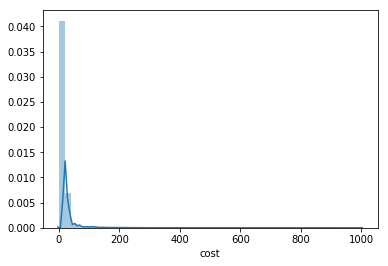

In [0]:
import seaborn as sns
sns.distplot(y_train);

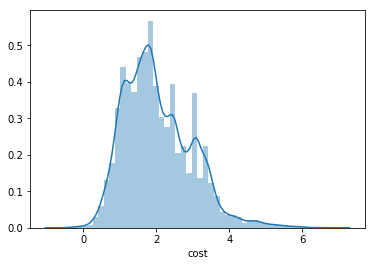

In [0]:
y_train_log = np.log(y_train)
sns.distplot(y_train_log);

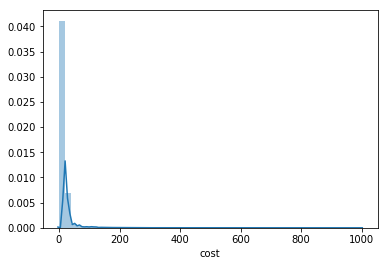

In [0]:
y_train_log_exp = np.expm1(y_train_log)
sns.distplot(y_train_log_exp);

In [0]:
model.fit(x_train, y_train_log)

y_pred_log = model.predict(x_val)

y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.6496605059511013

In [0]:
from sklearn.metrics import mean_squared_error as mse

def rmse(y_true, y_pred):
  return np.sqrt(mse(y_true, y_pred))

In [0]:
y_val_log = np.log1p(y_val)
rmse(y_val_log, y_pred_log)

0.6496605059511013

In [0]:
#!pip install category_encoders

In [0]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983
10,TA-00004,S-0066,2013-07-07,0,0,Yes,5,6.668596
11,TA-00004,S-0066,2013-07-07,0,0,Yes,10,4.754539
12,TA-00004,S-0066,2013-07-07,0,0,Yes,25,3.608331


In [0]:
def wrangle(x):
  x = x.copy()
  
  x['quote_date'] = pd.to_datetime(x['quote_date'], infer_datetime_format = True)
  x['quote_year'] = x['quote_date'].dt.year
  x['quote_month'] = x['quote_date'].dt.month
  
  x = x.drop(columns='quote_date')
  
  x = x.drop(columns='tube_assembly_id')
  
  return x

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [0]:
features = train_wrangled.columns.drop(target)
print('Features:', features.tolist())

Features: ['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'quote_year', 'quote_month']


In [0]:
x_train = train_wrangled[features]
x_val = val_wrangles[features]

In [0]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  rfr(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)
y_pred_log = pipeline.predict(x_val)
rmse(y_val_log, y_pred_log)

0.44473653825360976

In [0]:
y_pred = np.expm1(y_pred_log)
rmsle(y_val, y_pred)

0.44473653825360976

In [0]:
pipeline.named_steps['randomforestregressor'].feature_importances_

array([0.09842109, 0.17595005, 0.04602993, 0.00670771, 0.52987582,
       0.08061959, 0.06239581])

In [0]:
x_train.columns

Index(['supplier', 'annual_usage', 'min_order_quantity', 'bracket_pricing',
       'quantity', 'quote_year', 'quote_month'],
      dtype='object')

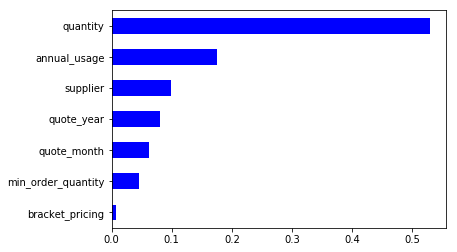

In [0]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, x_train.columns)

importances.sort_values().plot.barh(color='blue');

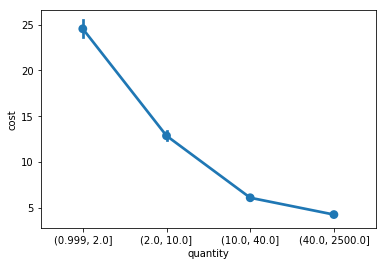

In [0]:
quantity_quartiles = pd.qcut(train_wrangled['quantity'], q=4)
sns.pointplot(x=quantity_quartiles, y=train_wrangled['cost']);

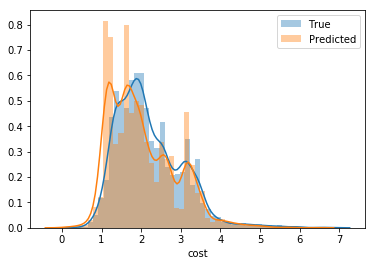

In [0]:
sns.distplot(y_val_log, label=True)
sns.distplot(y_pred_log, label='Predicted')
plt.legend();

In [0]:
for path in glob('competition_data/*csv'):
  df = pd.read_csv(path)
  shared_columns = set(df.columns) & set(train.columns)
  if shared_columns:
    print(path, df.shape)
    print(df.columns.tolist(), '\n')

competition_data/test_set.csv (30235, 8)
['id', 'tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity'] 

competition_data/tube.csv (21198, 16)
['tube_assembly_id', 'material_id', 'diameter', 'wall', 'length', 'num_bends', 'bend_radius', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'] 

competition_data/bill_of_materials.csv (21198, 17)
['tube_assembly_id', 'component_id_1', 'quantity_1', 'component_id_2', 'quantity_2', 'component_id_3', 'quantity_3', 'component_id_4', 'quantity_4', 'component_id_5', 'quantity_5', 'component_id_6', 'quantity_6', 'component_id_7', 'quantity_7', 'component_id_8', 'quantity_8'] 

competition_data/train_set.csv (30213, 8)
['tube_assembly_id', 'supplier', 'quote_date', 'annual_usage', 'min_order_quantity', 'bracket_pricing', 'quantity', 'cost'] 

competition_data/specs.csv (21198, 11)
['tube_assembly_id', 'spec1', 'spec2', 'spec3', 'spec4', 'spec

In [0]:
tube = pd.read_csv('competition_data/tube.csv')

tube.describe()

,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000,21198.000000
mean,23.687764,1.578402,100.312844,3.748137,49.350767,0.044485,0.006746,0.022644
std,25.396277,0.745749,70.542771,2.265405,196.468480,0.260737,0.100015,0.199676
min,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,15.880000,1.650000,86.000000,3.000000,38.100000,0.000000,0.000000,0.000000
75%,25.400000,1.650000,135.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,5.000000,8.000000


In [0]:
tube.describe(exclude='number')

,tube_assembly_id,material_id,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x
count,21198,20919,21198,21198,21198,21198,21198,21198
unique,21198,19,2,2,2,2,25,27
top,TA-04088,SP-0029,N,N,N,N,EF-003,EF-003
freq,1,11488,20118,18015,20377,18493,11388,10863


In [0]:
def wrangle(x):
  x = x.copy()
  
  x['quote_date'] = pd.to_datetime(x['quote_date'], infer_datetime_format = True)
  x['quote_year'] = x['quote_date'].dt.year
  x['quote_month'] = x['quote_date'].dt.month
  
  tube = pd.read_csv('competition_data/tube.csv')
  x = x.merge(tube, how='left')
  
  x = x.drop(columns='quote_date')
  
  x = x.drop(columns='tube_assembly_id')
  
  return x

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [0]:
train_wrangled.shape, val_wrangled.shape

((22628, 23), (7585, 23))

In [0]:
train_wrangled.head()

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_year,quote_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0


In [0]:
x_train = train_wrangled.drop(columns=target)
x_val = val_wrangled.drop(columns=target)

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  rfr(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a',
                                      'end_x'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'data_type': dtype('O'),
                                          'mapping': S-0066     1
S-0026     2
S-0030     3
S-0013     4
S-0062     5
S-0014     6
S-0072     7
S-0...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
               

In [0]:
y_pred_log = pipeline.predict(x_val)
rmse(y_val_log, y_pred_log)

0.36622265470649834

In [0]:
test_wrangled = wrangle(test)
x_test = test_wrangled.drop(columns='id')

In [0]:
y_pred_log = pipeline.predict(x_test)
y_pred = np.expm1(y_pred_log)

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['cost'] = y_pred
submission.to_csv('Anika-pipes-1.csv', index=False)

In [0]:
specs = pd.read_csv('competition_data/specs.csv')

In [0]:
specs.shape

(21198, 11)

In [0]:
specs.describe()

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
count,21198,7129,6844,5840,4154,2921,2071,535,106,20,1
unique,21198,45,51,49,38,37,24,13,4,3,1
top,TA-04088,SP-0007,SP-0012,SP-0080,SP-0026,SP-0080,SP-0082,SP-0082,SP-0082,SP-0088,SP-0080
freq,1,3002,1736,1798,1492,1780,1167,322,73,18,1


In [0]:
specs.describe(exclude='number')

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
count,21198,7129,6844,5840,4154,2921,2071,535,106,20,1
unique,21198,45,51,49,38,37,24,13,4,3,1
top,TA-04088,SP-0007,SP-0012,SP-0080,SP-0026,SP-0080,SP-0082,SP-0082,SP-0082,SP-0088,SP-0080
freq,1,3002,1736,1798,1492,1780,1167,322,73,18,1


In [0]:
def wrangle(x):
  x = x.copy()
  
  x['quote_date'] = pd.to_datetime(x['quote_date'], infer_datetime_format = True)
  x['quote_year'] = x['quote_date'].dt.year
  x['quote_month'] = x['quote_date'].dt.month
  
  tube = pd.read_csv('competition_data/tube.csv')
  x = x.merge(tube, how='left')
  
  specs = pd.read_csv('competition_data/specs.csv')
  x = x.merge(specs, how='left')
  
  x = x.drop(columns='quote_date')
  
  x = x.drop(columns='tube_assembly_id')
  
  return x

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [0]:
train_wrangled.shape, val_wrangled.shape

((22628, 33), (7585, 33))

In [0]:
train_wrangled.head()

,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,quote_year,quote_month,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,S-0066,0,0,Yes,1,21.972702,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S-0066,0,0,Yes,2,12.407983,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S-0066,0,0,Yes,5,6.668596,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S-0066,0,0,Yes,10,4.754539,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S-0066,0,0,Yes,25,3.608331,2013,7,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
x_train = train_wrangled.drop(columns=target)
x_val = val_wrangled.drop(columns=target)

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  rfr(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a', 'end_x',
                                      'spec1', 'spec2', 'spec3', 'spec4',
                                      'spec5', 'spec6', 'spec7', 'spec8',
                                      'spec9', 'spec10'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'supplier',
                                          'dat...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                

In [0]:
y_pred_log = pipeline.predict(x_val)
rmse(y_val_log, y_pred_log)

#so my RMSE went up with the specs set, which is obviously not the goal.
#probably due to lots of NaN values

0.36802394702800084

In [0]:
#competition_data/bill_of_materials.csv (21198, 17)

In [0]:
materials = pd.read_csv('competition_data/bill_of_materials.csv')

materials.shape

(21198, 17)

In [0]:
def wrangle(x):
  x = x.copy()
  
  x['quote_date'] = pd.to_datetime(x['quote_date'], infer_datetime_format = True)
  x['quote_year'] = x['quote_date'].dt.year
  x['quote_month'] = x['quote_date'].dt.month
  
  tube = pd.read_csv('competition_data/tube.csv')
  x = x.merge(tube, how='left')
  
  materials = pd.read_csv('competition_data/bill_of_materials.csv')
  x = x.merge(materials, how='left')
  
  x = x.drop(columns='quote_date')
  
  x = x.drop(columns='tube_assembly_id')
  
  return x

train_wrangled = wrangle(train)
val_wrangled = wrangle(val)

In [0]:
train_wrangled.shape, val_wrangled.shape

((22628, 39), (7585, 39))

In [0]:
train_wrangled = train_wrangled.fillna(method='bfill')
train_wrangled = train_wrangled.fillna(method='ffill')

train_wrangled.isna().sum()

supplier              0
annual_usage          0
min_order_quantity    0
bracket_pricing       0
quantity              0
cost                  0
quote_year            0
quote_month           0
material_id           0
diameter              0
wall                  0
length                0
num_bends             0
bend_radius           0
end_a_1x              0
end_a_2x              0
end_x_1x              0
end_x_2x              0
end_a                 0
end_x                 0
num_boss              0
num_bracket           0
other                 0
component_id_1        0
quantity_1            0
component_id_2        0
quantity_2            0
component_id_3        0
quantity_3            0
component_id_4        0
quantity_4            0
component_id_5        0
quantity_5            0
component_id_6        0
quantity_6            0
component_id_7        0
quantity_7            0
component_id_8        0
quantity_8            0
dtype: int64

In [0]:
x_train = train_wrangled.drop(columns=target)
x_val = val_wrangled.drop(columns=target)

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  rfr(n_estimators=100, random_state=42, n_jobs=-1))

pipeline.fit(x_train, y_train_log)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['supplier', 'bracket_pricing',
                                      'material_id', 'end_a_1x', 'end_a_2x',
                                      'end_x_1x', 'end_x_2x', 'end_a', 'end_x',
                                      'component_id_1', 'component_id_2',
                                      'component_id_3', 'component_id_4',
                                      'component_id_5', 'component_id_6',
                                      'component_id_7', 'component_id_8'],
                                drop_invariant=False, handle_missing='value'...
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                        

In [0]:
y_pred_log = pipeline.predict(x_val)
rmse(y_val_log, y_pred_log)

ValueError: ignored